In [7]:
!pip install pandas
!pip install seaborn
!pip install librosa



import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa 
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")


In [8]:
paths = []
labels = []

for dirname, _, filenames in os.walk(r"C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive\Desktop\SAP\TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')        





Dataset is Loaded


In [9]:
paths[:5]

['C:\\Users\\PRIYA GUPTA\\OneDrive\\Desktop\\OneDrive\\Desktop\\SAP\\TESS Toronto emotional speech set data\\speech_Emotion_Recognition.ipynb',
 'C:\\Users\\PRIYA GUPTA\\OneDrive\\Desktop\\OneDrive\\Desktop\\SAP\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\PRIYA GUPTA\\OneDrive\\Desktop\\OneDrive\\Desktop\\SAP\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\PRIYA GUPTA\\OneDrive\\Desktop\\OneDrive\\Desktop\\SAP\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\PRIYA GUPTA\\OneDrive\\Desktop\\OneDrive\\Desktop\\SAP\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav']

In [10]:
labels[:5]

['recognition', 'angry', 'angry', 'angry', 'angry']

In [11]:
#create a datafram 
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...,recognition
1,C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...,angry
2,C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...,angry
3,C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...,angry
4,C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...,angry


In [12]:
df['label'].value_counts()

label
angry          800
disgust        800
fear           800
happy          800
ps             800
neutral        800
sad            800
recognition      1
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

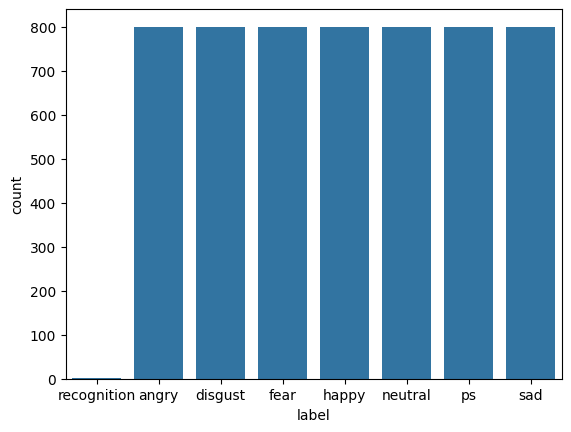

In [13]:
# Expolatary data analysis

sns.countplot(x='label', data=df)


In [14]:
print(df.columns)


Index(['speech', 'label'], dtype='object')


In [15]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10, 5))
    librosa.display.waveplot(data, sr=sr)
    plt.show()
def spectogram(data,sr,emotion):
    x =librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 5))
    plt.title(emotion,size=20)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', cmap='coolwarm')
    plt.colorbar()

    emotion = 'fear'
    path = df['speech'][df['label'] == emotion].iloc[0] 
    data, sampling_rate = librosa.load(path)
    waveplot(data,sampling_rate,emotion)
    spectogram(data,sampling_rate,emotion)
    Audio()



In [16]:
emotion = 'fear'
filtered_speech = df['speech'][df['label'] == emotion]
print(filtered_speech)  # Verify if any entries exist for the emotion 'fear'


401     C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...
402     C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...
403     C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...
404     C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...
405     C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...
                              ...                        
4796    C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...
4797    C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...
4798    C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...
4799    C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...
4800    C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...
Name: speech, Length: 800, dtype: object


In [17]:
if not filtered_speech.empty:
    path = filtered_speech.iloc[0]
    print("Audio path:", path)  # Verify the path is correct


Audio path: C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive\Desktop\SAP\TESS Toronto emotional speech set data\OAF_Fear\OAF_back_fear.wav


In [18]:
import librosa.display
import matplotlib.pyplot as plt

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    librosa.display.waveshow(data, sr=sr)  # Updated function
    plt.title(f'Waveplot for {emotion} emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()


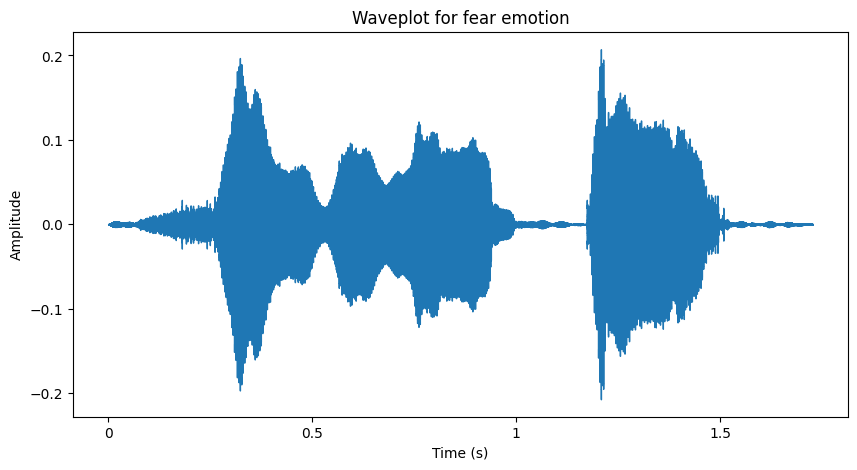

In [19]:
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)

In [20]:
def spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    
    # Create a spectrogram using librosa
    D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)
    
    # Display the spectrogram
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(f'Spectrogram for {emotion} emotion')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

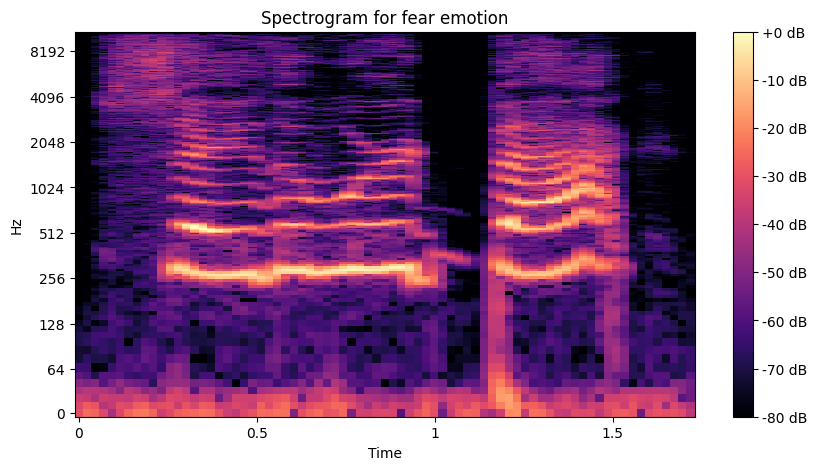

In [21]:

spectrogram(data, sampling_rate, emotion)

In [22]:
Audio(path)

Processing file: C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive\Desktop\SAP\TESS Toronto emotional speech set data\OAF_happy\OAF_back_happy.wav


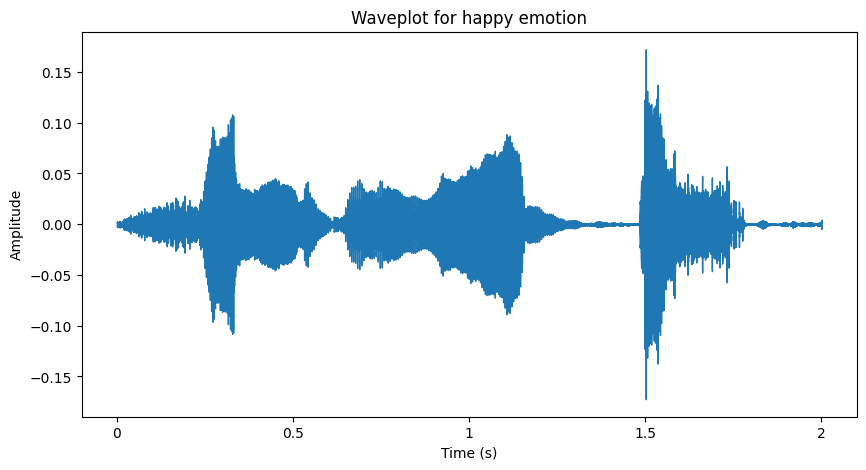

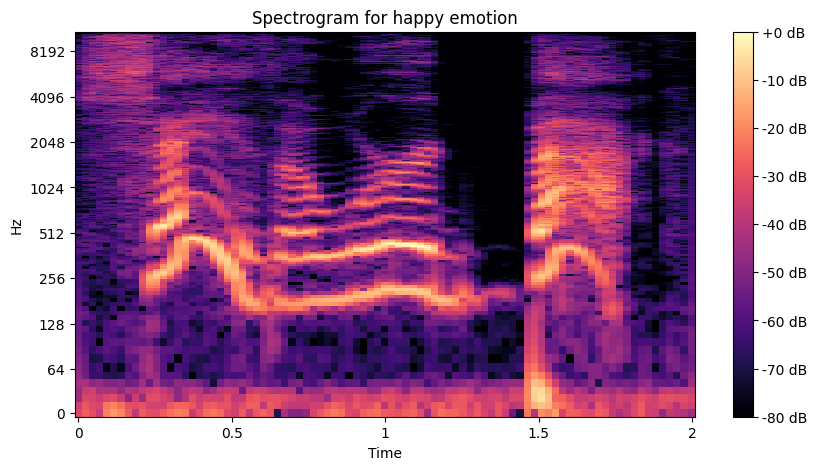

In [23]:
import librosa
import os
import matplotlib.pyplot as plt
from IPython.display import Audio

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    librosa.display.waveshow(data, sr=sr)
    plt.title(f'Waveplot for {emotion} emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(f'Spectrogram for {emotion} emotion')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# Main logic
emotion = 'happy'
filtered_speech = df['speech'][df['label'] == emotion]

if filtered_speech.empty:
    print(f"No audio files found for emotion: {emotion}")
else:
    path = filtered_speech.iloc[0]
    
    if not os.path.exists(path):
        print(f"File does not exist: {path}")
    else:
        print(f"Processing file: {path}")
        
        # Load audio with duration limit
        data, sampling_rate = librosa.load(path, duration=10)
        
        # Visualize and play audio
        waveplot(data, sampling_rate, emotion)
        spectrogram(data, sampling_rate, emotion)
        display(Audio(data, rate=sampling_rate))


Processing file: C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive\Desktop\SAP\TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav


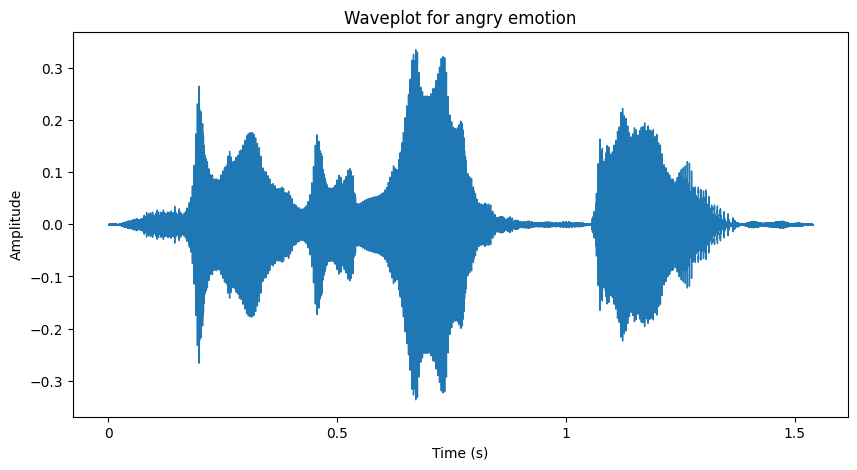

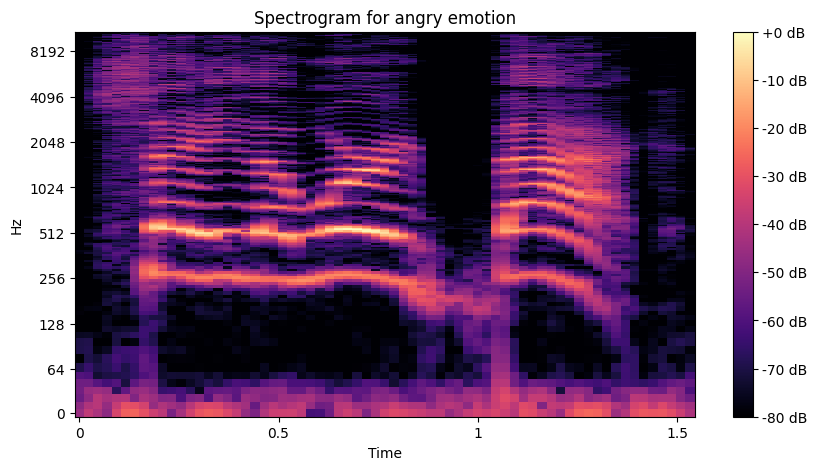

In [24]:
import librosa
import os
import matplotlib.pyplot as plt
from IPython.display import Audio

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    librosa.display.waveshow(data, sr=sr)
    plt.title(f'Waveplot for {emotion} emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(f'Spectrogram for {emotion} emotion')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# Main logic
emotion = 'angry'
filtered_speech = df['speech'][df['label'] == emotion]

if filtered_speech.empty:
    print(f"No audio files found for emotion: {emotion}")
else:
    path = filtered_speech.iloc[0]
    
    if not os.path.exists(path):
        print(f"File does not exist: {path}")
    else:
        print(f"Processing file: {path}")
        
        # Load audio with duration limit
        data, sampling_rate = librosa.load(path, duration=10)
        
        # Visualize and play audio
        waveplot(data, sampling_rate, emotion)
        spectrogram(data, sampling_rate, emotion)
        display(Audio(data, rate=sampling_rate))


Processing file: C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive\Desktop\SAP\TESS Toronto emotional speech set data\OAF_disgust\OAF_back_disgust.wav


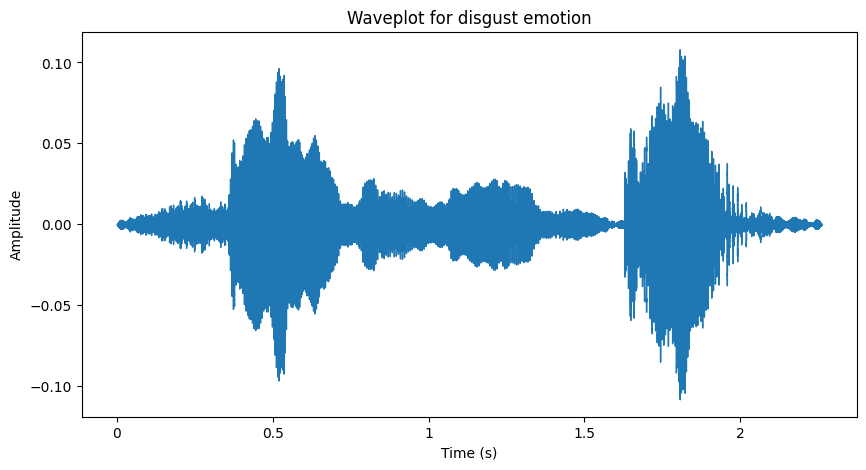

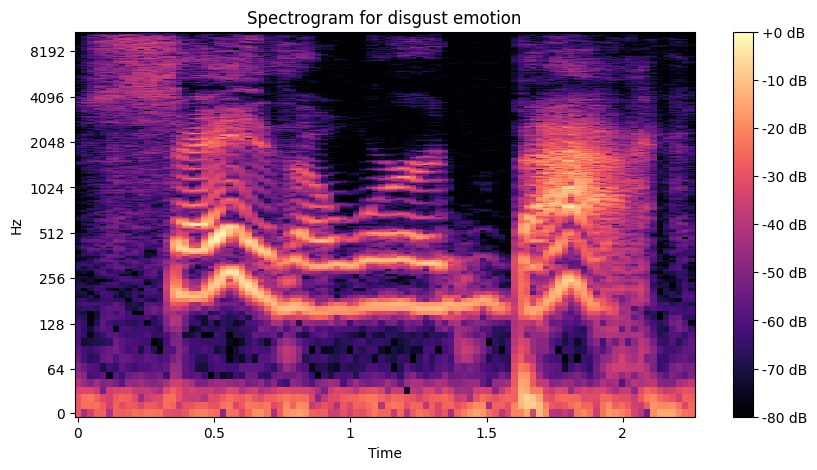

In [26]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    librosa.display.waveshow(data, sr=sr)
    plt.title(f'Waveplot for {emotion} emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(f'Spectrogram for {emotion} emotion')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# Main logic
emotion = 'disgust'
filtered_speech = df['speech'][df['label'] == emotion]

if filtered_speech.empty:
    print(f"No audio files found for emotion: {emotion}")
else:
    path = filtered_speech.iloc[0]
    
    if not os.path.exists(path):
        print(f"File does not exist: {path}")
    else:
        print(f"Processing file: {path}")
        
        # Load audio with duration limit
        data, sampling_rate = librosa.load(path, duration=10)
        
        # Visualize and play audio
        waveplot(data, sampling_rate, emotion)
        spectrogram(data, sampling_rate, emotion)
        display(Audio(data, rate=sampling_rate))


Processing file: C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive\Desktop\SAP\TESS Toronto emotional speech set data\OAF_neutral\OAF_back_neutral.wav


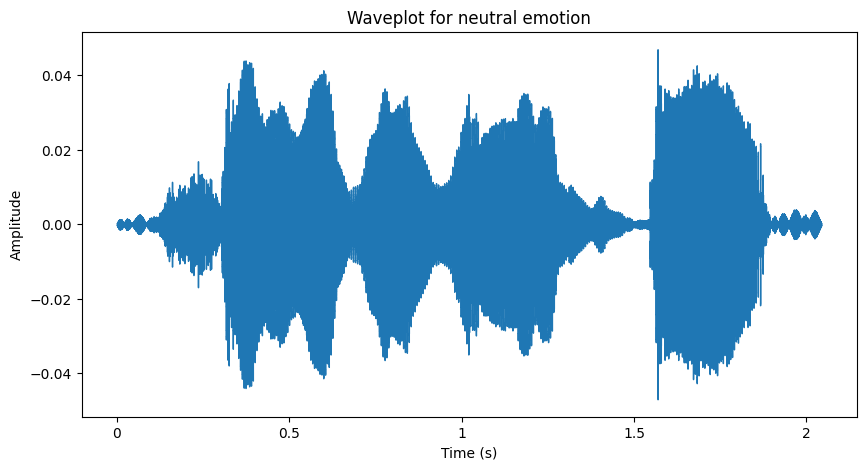

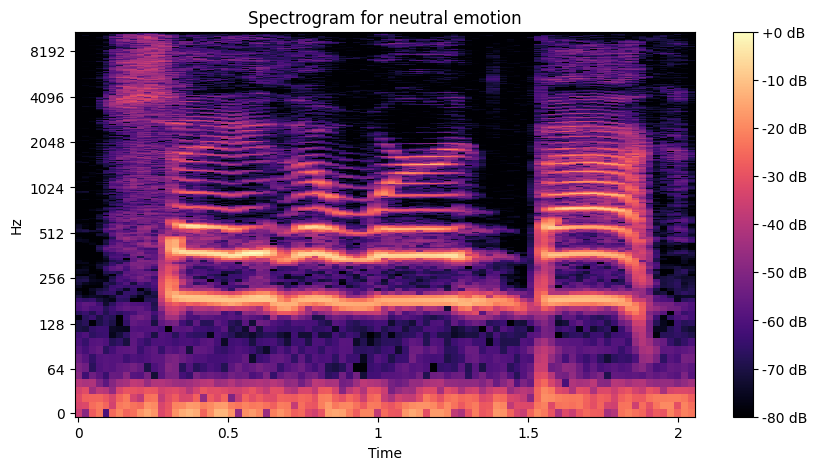

In [27]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    librosa.display.waveshow(data, sr=sr)
    plt.title(f'Waveplot for {emotion} emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(f'Spectrogram for {emotion} emotion')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# Main logic
emotion = 'neutral'
filtered_speech = df['speech'][df['label'] == emotion]

if filtered_speech.empty:
    print(f"No audio files found for emotion: {emotion}")
else:
    path = filtered_speech.iloc[0]
    
    if not os.path.exists(path):
        print(f"File does not exist: {path}")
    else:
        print(f"Processing file: {path}")
        
        # Load audio with duration limit
        data, sampling_rate = librosa.load(path, duration=10)
        
        # Visualize and play audio
        waveplot(data, sampling_rate, emotion)
        spectrogram(data, sampling_rate, emotion)
        display(Audio(data, rate=sampling_rate))


Processing file: C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive\Desktop\SAP\TESS Toronto emotional speech set data\OAF_Sad\OAF_back_sad.wav


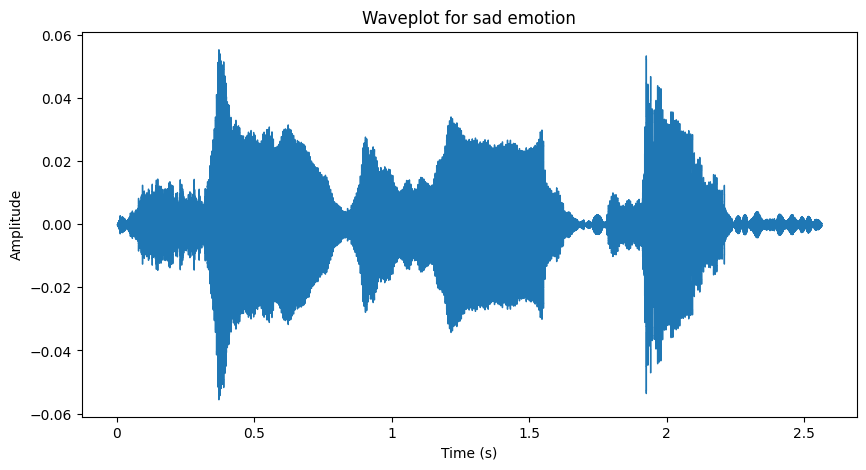

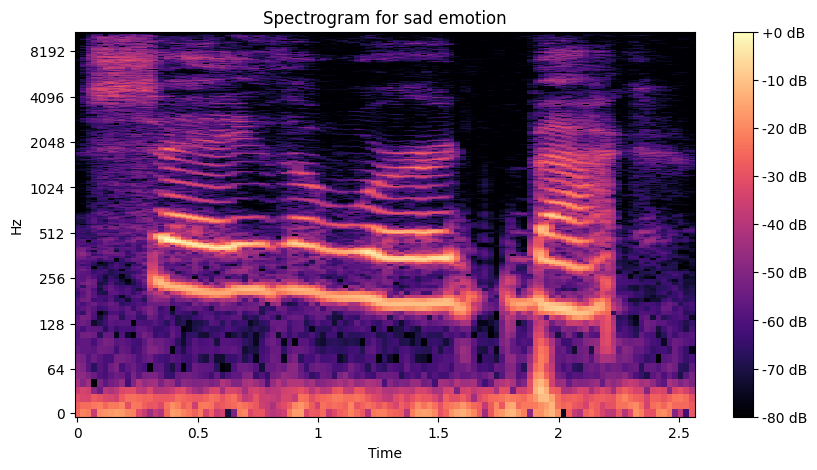

In [91]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    librosa.display.waveshow(data, sr=sr)
    plt.title(f'Waveplot for {emotion} emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(f'Spectrogram for {emotion} emotion')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# Main logic
emotion = 'sad'
filtered_speech = df['speech'][df['label'] == emotion]

if filtered_speech.empty:
    print(f"No audio files found for emotion: {emotion}")
else:
    path = filtered_speech.iloc[0]
    
    if not os.path.exists(path):
        print(f"File does not exist: {path}")
    else:
        print(f"Processing file: {path}")
        
        # Load audio with duration limit
        data, sampling_rate = librosa.load(path, duration=10)
        
        # Visualize and play audio
        waveplot(data, sampling_rate, emotion)
        spectrogram(data, sampling_rate, emotion)
        display(Audio(data, rate=sampling_rate))


Features Extraction


In [28]:
import os

file_path = df['speech'][0]
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    print(f"File exists at: {file_path}")


File exists at: C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive\Desktop\SAP\TESS Toronto emotional speech set data\speech_Emotion_Recognition.ipynb


In [29]:
df['speech'] = df['speech'].apply(lambda x: x if x.endswith(('.wav')) else None)
df = df.dropna(subset=['speech'])  # Drop rows where the 'speech' column is now None


In [30]:
# Check the structure of the DataFrame
print(df.shape)  # Should show (rows, columns)

# Display the first few rows
print(df.head())


(5600, 2)
                                              speech  label
1  C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...  angry
2  C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...  angry
3  C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...  angry
4  C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...  angry
5  C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...  angry


In [31]:
# Access the first row using iloc to avoid KeyError
file_path = df.iloc[0]['speech']
print(f"File exists at: {file_path}")


File exists at: C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive\Desktop\SAP\TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav


In [32]:
import os

# Check if the first file path exists
if os.path.exists(file_path):
    print(f"File exists: {file_path}")
else:
    print(f"File does not exist: {file_path}")


File exists: C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive\Desktop\SAP\TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav


In [33]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfccs


In [34]:
# Define the function to extract MFCC features
def extract_mfcc(filename):
    try:
        y, sr = librosa.load(filename, duration=3, offset=0.5)
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
        return mfcc
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        return None

# Apply the function to each file path in the 'speech' column
df['mfcc'] = df['speech'].apply(lambda x: extract_mfcc(x))

# Check the result
print(df.head())


                                              speech  label  \
1  C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...  angry   
2  C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...  angry   
3  C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...  angry   
4  C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...  angry   
5  C:\Users\PRIYA GUPTA\OneDrive\Desktop\OneDrive...  angry   

                                                mfcc  
1  [-396.9862, 77.44054, -19.59279, -21.666693, -...  
2  [-465.73267, 98.77373, 0.65600806, -32.74544, ...  
3  [-429.79196, 46.12401, 1.5550473, -0.21709459,...  
4  [-403.46118, 76.32369, -12.531776, -22.288858,...  
5  [-434.05756, 77.4455, 10.8654995, 16.092943, 8...  


In [35]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [36]:
X_mfcc

1       [-396.9862, 77.44054, -19.59279, -21.666693, -...
2       [-465.73267, 98.77373, 0.65600806, -32.74544, ...
3       [-429.79196, 46.12401, 1.5550473, -0.21709459,...
4       [-403.46118, 76.32369, -12.531776, -22.288858,...
5       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
5596    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5597    [-426.90918, 102.54756, 24.800041, 43.048096, ...
5598    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5599    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
5600    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 5600, dtype: object

In [37]:
X =[x for x in X_mfcc]

X = np.array(X)

X.shape

(5600, 40)

In [38]:
## input split 
X = np.expand_dims(X, -1)
X.shape 

(5600, 40, 1)

In [39]:
!pip install keras


In [40]:
!pip install tensorflow


In [54]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [56]:
y=y.toarray()

In [ ]:
y.shape

CREATE THE LSTM MODEL 
Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture designed to process sequential data by maintaining long-term dependencies in the data. It achieves this by introducing a memory cell and gating mechanisms (forget, input, and output gates) that regulate the flow of information, enabling the model to selectively remember or forget information over extended sequences.

LSTMs are widely used in time series forecasting, natural language processing, speech recognition, and other tasks that involve sequential or temporal data.

In [49]:
from keras.models import Sequential
from keras.layers import Dense , LSTM ,Dropout

model = Sequential([
    LSTM(123,return_sequences=False , input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
    
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# TRAIN THE MODEL 
history =model.fit(X,y, validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.2375 - loss: 1.8926 - val_accuracy: 0.2723 - val_loss: 1.8185
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.4290 - loss: 1.6741 - val_accuracy: 0.3777 - val_loss: 1.6660
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.4993 - loss: 1.4444 - val_accuracy: 0.5268 - val_loss: 1.3382
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.6149 - loss: 1.1148 - val_accuracy: 0.5643 - val_loss: 1.0999
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.6767 - loss: 0.8698 - val_accuracy: 0.7482 - val_loss: 0.7231
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.7579 - loss: 0.6685 - val_accuracy: 0.9304 - val_loss: 0.3355
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.8500 - loss: 0.4648 - val_accuracy: 0.9518 - val_loss: 0.2107
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.8965 - loss: 0.3241 - val_accuracy: 0.9563 - v

    PLOT THE RESULT 

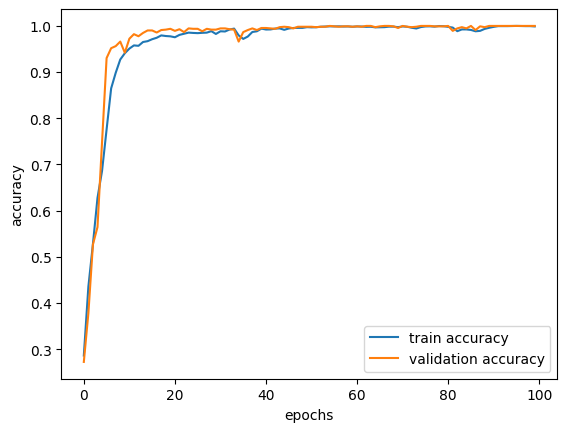

In [58]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc, label='train accuracy')

plt.plot(epochs, val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

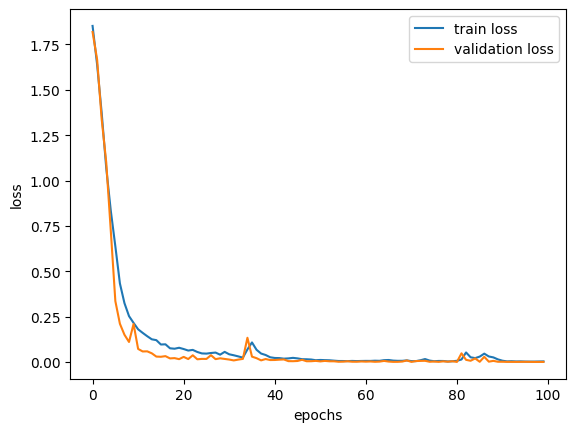

In [59]:

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs,loss, label='train loss')

plt.plot(epochs, val_loss, label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()